In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
bs=64

In [3]:
np.random.seed(1001)
tfms = get_transforms(do_flip=False)
"""
data = (ImageFileList.from_folder("data")
    .label_from_folder()
    .split_by_folder()
    .datasets()
    .transform(tfms, size=64)
    .databunch())
"""
data = ImageDataBunch.from_folder('data', ds_tfms=tfms, size=64).normalize()

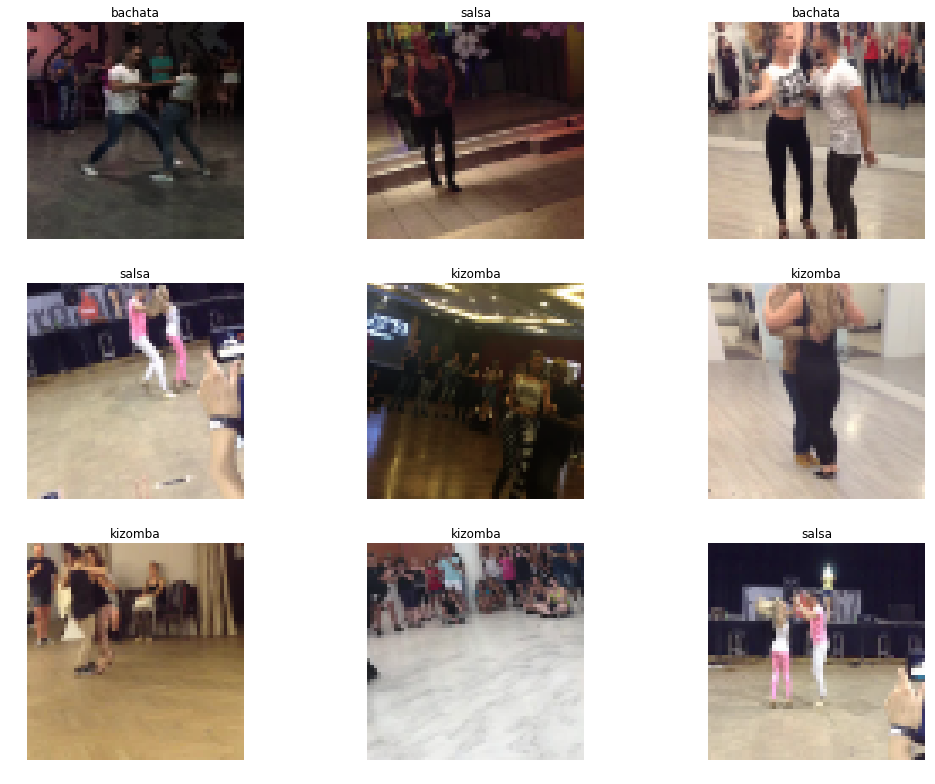

In [4]:
data.show_batch(rows=3, figsize=(15,11))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4, max_lr=slice(5e-9,1e-8))

epoch,train_loss,valid_loss,error_rate,time
0,2.354145,1.892897,0.764706,03:57
1,2.359157,1.869810,0.752142,04:06
2,2.404027,1.857327,0.756139,04:12


KeyboardInterrupt: 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


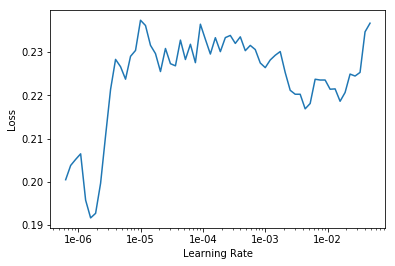

In [10]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


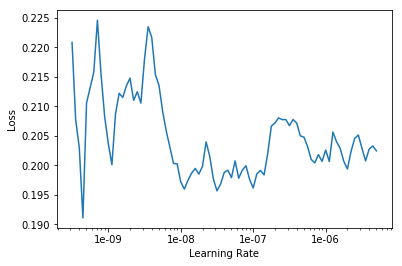

In [11]:
learn.lr_find(start_lr=1e-10, end_lr=1e-5)
learn.recorder.plot()

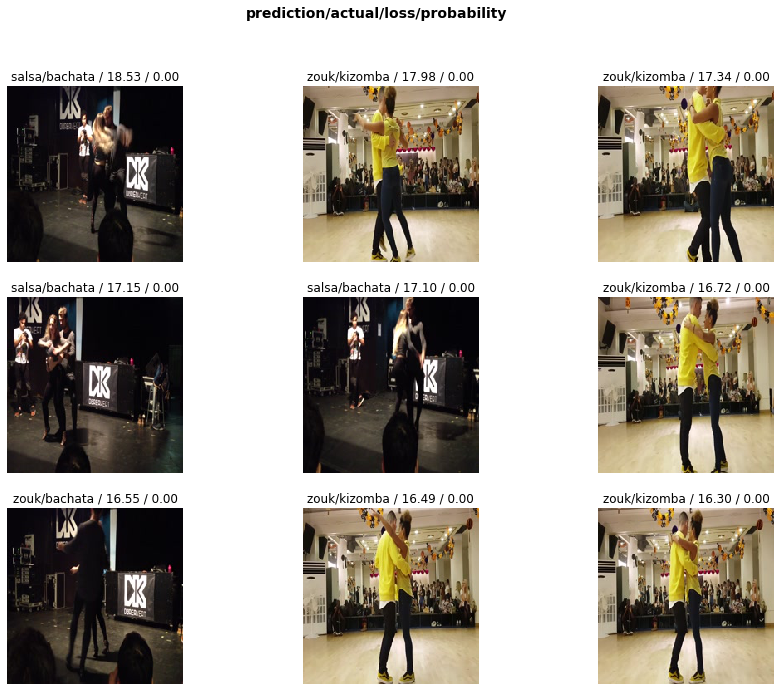

In [6]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

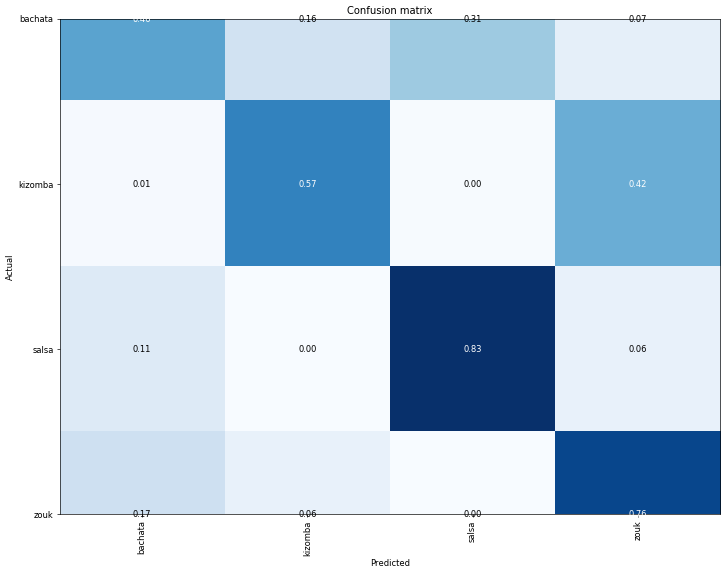

In [7]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60, normalize=True)

In [8]:
interp.most_confused(min_val=2)

[('kizomba', 'zouk', 207),
 ('bachata', 'salsa', 154),
 ('bachata', 'kizomba', 78),
 ('zouk', 'bachata', 77),
 ('bachata', 'zouk', 36),
 ('salsa', 'bachata', 35),
 ('zouk', 'kizomba', 27),
 ('salsa', 'zouk', 19),
 ('kizomba', 'bachata', 4),
 ('kizomba', 'salsa', 2)]

In [11]:
learn.export()

In [29]:
learn.data.classes

['bachata', 'kizomba', 'salsa', 'zouk']

# Finetune

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


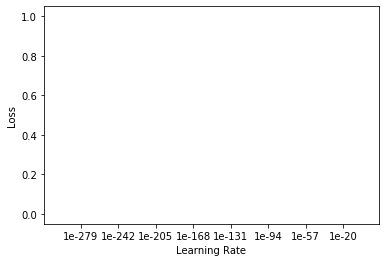

In [14]:
learn.lr_find()
learn.recorder.plot()